# 개요

- 텍스트 데이터 관련 분야
  - (*)데이터 분석 - 텍스트 마이님
    - 문자로 표현된 데이터(텍스트)에서 정보를 추출(얻어가는 과정)
      - **인사이트 도출**
    - 최종 결과물
      - EDA
        - **워드 클라우드**(단어(토큰단위)의 빈도를 집계 -> 크기순으로 군집 구성)
        - 바차트(빈도에 대한 크기비교)
        - 파이차트(비율/비중)
      - **핵심단어, 관심사 도출**

  - NLP - 자연어 처리ㅡ 딥러닝
    -  결과물
      - 핵심 키워드 추출
      - 챗봇(유사도 활용)
      - 기계 번역
      - 감정분석
      - 요약
      - 글생성
    - 데이터 처리
      - 텍스트 -> 수치로 표현(벡터단위)
      - 말뭉치
        -> 분절화(영미권, 한글/일본어/중국어(교착어),...):토큰구성
        -> 사전화(토큰을 기반으로 수치매칭)
        -> 문장을 수치로 표현:벡터화, 1차원 표현
        -> 패딩(문장의 길이를 동일하게 맞춤)
          : 벡터화된 문장을 무조건 4096크기로 맞춘다(GPT기준 최대 문장길이)
        -> 임베딩(압축)
        -> 정규화(필요시, 원-핫인코딩...)
        -> 학습 재료, 입력 데이터의 형태
        △ 위과정 전체:토크화, 도구:토크나이저
      
    - 허깅페이스
      - AI 커뮤니티, 주로 NLP 특화되어 있음
      - 토크나이저 도구, 모델 검색 및 제

  - LLM - 프럼프트 재료, 토큰의 기본 재료
    - 텍스트 -> 질의 -> 결과획득 : chatgpt(서비스) 해당 (일반인도 간편하게 사용 가능)
    - (*)openai api를 사용
      - 텍스트 -> 질의:프럼프트
      - 텍스트 -> 토큰화 -> 질의, 학습(파인튜닝, 모델을 내 입맛에 맞게 특화시켜 학습) 등등 가능 -> `서비스 구성`
      - 텍스트 -> 토큰화 => 벡터화로 볼 수 있음
      '나는 배가 고픕니다. ' => '[1, 4,2, 45,5, 5, .,0,0,0,0,0,0,0,0]'


# 토큰화, 토크나이저

- 토큰화
  - 간단하게 정리
    - 말뭉치, 문장 -> ..... -> [0, 1, 100, 4, ...]
    - 문장 -> 1차원 -> 벡터 토큰화
      - 간단하게 정리
          - 말뭉치, 문장 -> ..... -> [0, 1, 100, 4, ...]
              - 문장 -> 1차원 -> 벡터

- token, 토큰(모델이 이해할 수 있는 숫자)
  - 더 이상 나올 수 없는 단위
    - 한국어(교착어) : 명사, 형용사, 조사, ...
    - 알파벳 : 공백 기준 구분

- 도구
  - 영어(알파벳)
    - NLTK
  - 한국어
    - 코엔엘파이(konlpy)
    - konlpy.org
      - 분절도
        - Hannanum Class
        - Kkma Class
        - Komoran Class
        - Mecab Class
          - 일본에서 개발, 한국어 포팅
          - 코랩에서 현재 설치 x
        - Okt Class
  - 도구
    - https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0
    - 분절 기준, 도구별로 정리한 자료

- 결론
  - 말뭉치 -> 분전화 -> 토큰화 -> 원하는 작업을 수행할 수 있다

In [2]:
%pip install -q konlpy

In [3]:
# 확인(해당 패키지를 보여달라, 설명문 요청)
%pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: /usr/local/lib/python3.11/dist-packages
Requires: JPype1, lxml, numpy
Required-by: 


# 사용

In [4]:
# 모듈 가져오기 (Mecab 사용 불가, 별도 설치 필요)
from konlpy.tag import Okt, Kkma

In [5]:
# 기능 테스트, 더미 문장 필요
ko_text = '쌀쌀했던 아침과 달리 온화한 서풍이 불어오면서 낮부터는 기온이 껑충 오르겠습니다.'
ko_text

'쌀쌀했던 아침과 달리 온화한 서풍이 불어오면서 낮부터는 기온이 껑충 오르겠습니다.'

In [6]:
# 1. 토크나이저 도구 생성
tokenizer = Kkma()

In [7]:
# 2. 토큰화 진행
print(tokenizer.morphs(ko_text))

['쌀쌀', '하', '었', '더', 'ㄴ', '아침', '과', '달리', '온화', '하', 'ㄴ', '서풍', '이', '불어오', '면서', '낮', '부터', '늘', 'ㄴ', '기온', '이', '껑충', '오르', '겠', '습니다', '.']


In [8]:
# 2-1. 다른 도구로 토큰화 진행 -> 이 도구로 진행, 선택 사유는 너무 세부적으로 분절하지 않아서 선택
print(Okt().morphs(ko_text))

['쌀쌀했던', '아침', '과', '달리', '온화한', '서풍', '이', '불어오면서', '낮', '부터는', '기온', '이', '껑충', '오르겠습니다', '.']


# Raw 데이터 획득 (말뭉치)

- Korpora : 한국어 말뭉치 데이터(오픈된, 공유 가능한)를 묶어서 제공

In [9]:
%pip install Korpora -q

In [10]:
from Korpora import Korpora

# 말뭉치 목록
Korpora.corpus_list()

{'kcbert': 'beomi@github 님이 만드신 KcBERT 학습데이터',
 'korean_chatbot_data': 'songys@github 님이 만드신 챗봇 문답 데이터',
 'korean_hate_speech': '{inmoonlight,warnikchow,beomi}@github 님이 만드신 혐오댓글데이터',
 'korean_parallel_koen_news': 'jungyeul@github 님이 만드신 병렬 말뭉치',
 'korean_petitions': 'lovit@github 님이 만드신 2017.08 ~ 2019.03 청와대 청원데이터',
 'kornli': 'KakaoBrain 에서 제공하는 Natural Language Inference (NLI) 데이터',
 'korsts': 'KakaoBrain 에서 제공하는 Semantic Textual Similarity (STS) 데이터',
 'kowikitext': 'lovit@github 님이 만드신 wikitext 형식의 한국어 위키피디아 데이터',
 'namuwikitext': 'lovit@github 님이 만드신 wikitext 형식의 나무위키 데이터',
 'naver_changwon_ner': '네이버 + 창원대 NER shared task data',
 'nsmc': 'e9t@github 님이 만드신 Naver sentiment movie corpus v1.0',
 'question_pair': 'songys@github 님이 만드신 질문쌍(Paired Question v.2)',
 'modu_news': '국립국어원에서 만든 모두의 말뭉치: 뉴스 말뭉치',
 'modu_messenger': '국립국어원에서 만든 모두의 말뭉치: 메신저 말뭉치',
 'modu_mp': '국립국어원에서 만든 모두의 말뭉치: 형태 분석 말뭉치',
 'modu_ne': '국립국어원에서 만든 모두의 말뭉치: 개체명 분석 말뭉치',
 'modu_spoken': '국립국어원에서 만든 모두의 말뭉치: 구어 

In [11]:
# 'nsmc': 'e9t@github 님이 만드신 Naver sentiment movie corpus v1.0'
# 네이버 영화
review_corpus = Korpora.load('nsmc')


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : e9t@github
    Repository : https://github.com/e9t/nsmc
    References : www.lucypark.kr/docs/2015-pyconkr/#39

    Naver sentiment movie corpus v1.0
    This is a movie review dataset in the Korean language.
    Reviews were scraped from Naver Movies.

    The dataset construction is based on the method noted in
    [Large movie review dataset][^1] from Maas et al., 2011.

    [^1]: http://ai.stanford.edu/~amaas/data/sentiment/

    # License
    CC0 1.0 Universal (CC0 1.0) Public Domain Dedication
    Details in https://creativecommons.org/publicdomain/zero/1.0/

[Korpora] Corpus `nsmc` is already installed at /root/Korpora/nsmc/ratings_train.txt
[Korpora] Corpus `nsmc` is already installed at /root/Korpora/nsmc/ra

In [12]:
# 훈련 데이터 용도로 150000, 테스트 용도로 50000개 제공
len(review_corpus.train), len(review_corpus.test)

(150000, 50000)

In [13]:
# label : 0(부정), 1(긍정) => 감정분석(긍정/부정)용 데이터
review_corpus.train[0].text, review_corpus.train[0].label

('아 더빙.. 진짜 짜증나네요 목소리', 0)

In [14]:
# 데이터를 df 구조로 조정
import pandas as pd

# 비어있는 df
review_corpus_df = pd.DataFrame()

# 텍스트 파생변수 추가
review_corpus_df['doc']   = review_corpus.get_all_texts()
# 레이블 파생변수 추가
review_corpus_df['label'] = review_corpus.get_all_labels()

review_corpus_df.head(2)

,doc,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1


In [15]:
# 20만개 리뷰 데이터
review_corpus_df.shape

(200000, 2)

# 차트 한글 처리

In [17]:
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

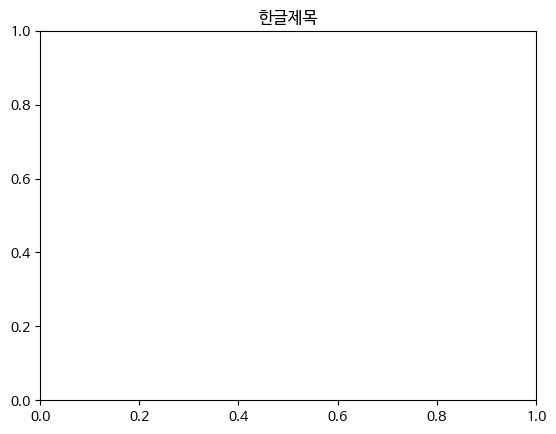

In [18]:
plt.title('한글제목')
plt.show()

# 워드 클라우드

- 제공된 말뭉치에서 개별 단어(토큰)의 **빈도 계산**
  - 빈도 => 중요도 의미
  - 빈도가 높으면 큰글씨, 작으면 작은글씨
  - 모양 : 구름모양, 사각형,특정 이미지 위

- 메세지
  - 텍스트 속에 **중요 핵심단어, 언급된 표현**

In [19]:
# 관련 패키지
%pip install wordcloud

In [20]:
# STOPWORDS : 불용어, 배제될 단어
from wordcloud import WordCloud, STOPWORDS
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [21]:
# 1. 불용어 준비
cus_stopwords = set(STOPWORDS) # 중복제거, 최초 불용어는 영어권 표현만 존재함

# 임시 데이터 추가
cus_stopwords.add('욕설')
cus_stopwords.add('비속어')
cus_stopwords.add('관련없는')

print(cus_stopwords)

{"i've", 'however', 'having', "can't", 'yours', 'your', 'down', "they've", 'as', 'off', 'www', 'of', "he's", 'on', "i'm", 'it', 'through', 'between', 'yourselves', "mustn't", "haven't", 'each', 'how', "we'll", 'from', 'same', "couldn't", 'who', 'not', 'what', "we're", 'he', 'was', 'below', 'is', 'we', 'have', "he'll", "doesn't", "don't", 'up', 'for', 'into', 'if', 'its', "you'd", 'with', "didn't", 'because', 'a', "wasn't", "it's", 'doing', 'our', 'then', 'can', 'get', 'should', 'are', 'http', "let's", 'this', 'therefore', 'him', 'all', 'since', 'themselves', "he'd", "hasn't", "hadn't", 'about', 'very', 'cannot', 'been', 'also', 'me', "where's", 'few', 'his', 'myself', "they're", 'whom', 'after', 'most', 'would', 'do', 'hence', 'more', 'out', 'where', "who's", 'both', "aren't", 'her', "what's", 'nor', 'over', '욕설', 'against', 'had', 'when', 'does', "she's", 'which', 'and', 'my', 'they', 'ever', 'before', "we've", 'shall', "i'll", "weren't", 'but', 'here', "you're", 'until', "isn't", 'th

In [22]:
# 2. 워드 클라우드 객체 생성
wc = WordCloud(
    # 폰트 지정
    font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    # 표현범위 제한
    max_words= 100, # 클라우드를 구성하는 워드 최대 수 -> 빈도 서열 x등까지 표현 -> 100개만 표현
    # 불용어 적용
    stopwords=cus_stopwords,
    # 배경색
    background_color='white'
    # 이미지 적용 가능 -> 이미지 위에 마스킹하여 워드클라우드 세팅
)

In [23]:
# 3. 워드 클라우드에 텍스트 주입
# Series 텍스트를 한개의 말뭉치로 구성 => 리뷰상에 자주 등장하는 표현 워드클라우드 적용
# review_corpus_df.doc 데이터(연속형)를 한개의 문자열로 구성하시오 : all_text, 실습
all_text = ' '.join(review_corpus_df.doc.values)
len(all_text)

7253455

In [24]:
# 분절 일단 wc 분절 도구 활용 -> (공백, . ..)기준(알파벳 기준)
# 분절, 카운트 진행
wc_ge = wc.generate(all_text)

In [25]:
# 토큰 : 빈도
# 100개만 표현
len(wc_ge.words_),wc_ge.words_

(100,
 {'영화': 1.0,
  '정말': 0.9140728917265231,
  '진짜': 0.8022080340516095,
  '너무': 0.6737164139398776,
  '그냥': 0.5195530726256983,
  'ㅋㅋ': 0.4015695663740356,
  '다': 0.3362596435222134,
  '더': 0.33293429103484967,
  '좀': 0.3140462889066241,
  '그리고': 0.3034051609470604,
  '그': 0.2891726523011439,
  '왜': 0.27068369247140195,
  '완전': 0.2612396914072892,
  '참': 0.25006650704974726,
  '아': 0.23689811119978718,
  '이런': 0.23649906890130354,
  '역시': 0.2341048151104017,
  'ㅋㅋㅋ': 0.23357275871242353,
  'ㅠㅠ': 0.23290768821495078,
  '이': 0.2266560255387071,
  '내가': 0.22426177174780526,
  'ㅋ': 0.22186751795690343,
  '이거': 0.21707901037509977,
  '드라마': 0.2137536578877361,
  '이렇게': 0.20670391061452514,
  '최고': 0.20537376961957968,
  'ㅡㅡ': 0.2011173184357542,
  '난': 0.18475658419792498,
  '평점': 0.1799680766161213,
  '영화는': 0.17956903431763768,
  'ㅎㅎ': 0.17544559723330674,
  '영화가': 0.17345038574088853,
  '이게': 0.16679968076616122,
  '이건': 0.1653365256717212,
  '스토리': 0.16427241287576483,
  '하지만': 0.156

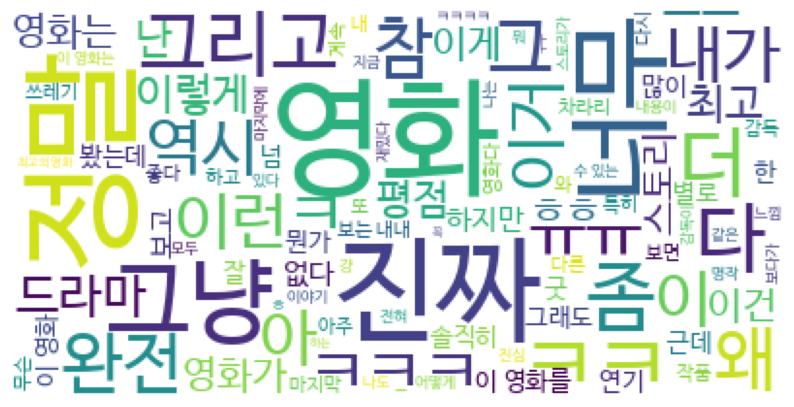

In [26]:
# 플로팅
plt.figure(figsize=(10,10))

plt.imshow(wc_ge)

plt.axis('off') # 차트상의 정보 제거

plt.show()

In [27]:
# 말뭉치 -> 분절(Okt) -> 다시 문장으로 조립(공백기반) -> wc 제너레이터(공백기반 분절) 적용
# review_corpus_df.doc.apply(lambda x : ' '.join(Okt().morphs(x))

# 샘플
review_corpus_df.loc[1,'doc']
# wc에서 자체 도구로 분절 => 공백기반(영어식 기준) => 포스터보고, 초딩영화줄, 오버연기조차

'흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나'

In [28]:
# 한국어에 적합한 구조로 문장을 분절하여 다시 조립 -> 공백 기준으로 토큰화 진행시 그 의미를 정확하게 전달
' '.join(Okt().morphs(review_corpus_df.loc[1,'doc']))
# 한글 전용 : 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차 쪼갠다 => 빈도 대상이 변경됨

# LLM은 한국어적인 특징보다는 대체적으로 많은 표현의 양으로 학습 -> 대부분 표현 커버가 됨

'흠 ... 포스터 보고 초딩 영화 줄 .... 오버 연기 조차 가볍지 않구나'

In [29]:
# 원 문장 => Okt() 분절 => ' '을 구분자로 합치기 => 문장 새로 구성(토큰 단위로)
# 흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나 : before
# 흠 ... 포스터 보고 초딩 영화 줄 .... 오버 연기 조차 가볍지 않구나 : after
# 바꾼 문장으로 WC에 주입 => 워드 클라우드 생성

# 파생변수에 변경된 문장을 세팅 => 개수를 샘플링 10000개만 진행(학습정리시간 시)
tmp = review_corpus_df.sample(1000) # 임의로 무작위 1000개를 추출하여 진행
tmp['ndoc'] = tmp['doc'].apply( lambda x : ' '.join( Okt().morphs(x) ) )
# review_corpus_df['ndoc'] = review_corpus_df.doc.apply(lambda x : ' '.join(Okt().morphs(x)))

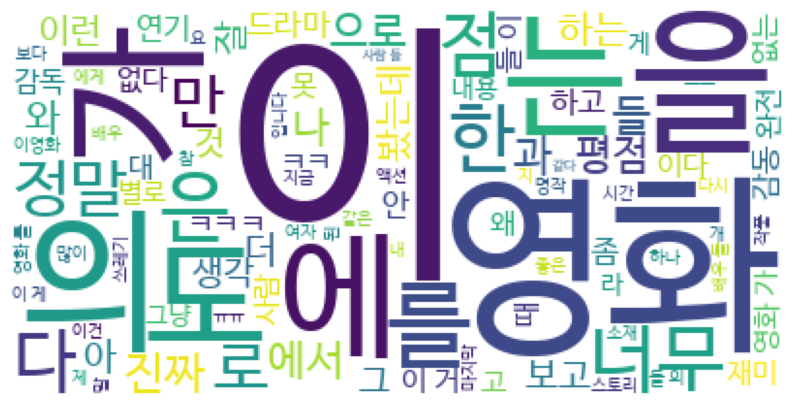

In [30]:
# ndoc => 한개의 문자열로 구성
all_text = ' '.join(tmp.ndoc.values)

# wc에 제너레이터 처리 -> wc 내부 토크나이저가 분절 시도 -> 빈도계산 완료
wc_ge = wc.generate(all_text)

# 의미 없는 조사등이 많이 포함되어 있다 => 불용어 처리 필요

# wc 시각화
plt.figure(figsize=(10,10))
plt.imshow(wc_ge)
plt.axis('off')
plt.show()

- 이미지 위에 워드클라우드

In [31]:
# 이미지 처리 패키지 PIL
from PIL import Image

In [32]:
import numpy as np

# 마스킹이 가능한 이미지를 사용
mask_img = np.array( Image.open('/content/heart.jpg') )

# 높이 720픽셀, 너비 767픽셀, 채널수 (칼라: R, G, B => 3개)
mask_img.shape # (h, w, channels수)

(720, 767, 3)

In [33]:
wc = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    max_words= 100,
    stopwords=cus_stopwords,
    background_color='white'
    # 이미지 적용 가능 -> 이미지 위에 마스킹하여 워드클라우드 세팅
    # 이미지 => 배열 => WordCloud의 mask 옵션 설정
    ,mask = mask_img
)

In [34]:
# 새로만든 워드클라우드에 샘플 1000개 넣어서 토큰화 후 빈도계산
wc_ge = wc.generate(all_text)

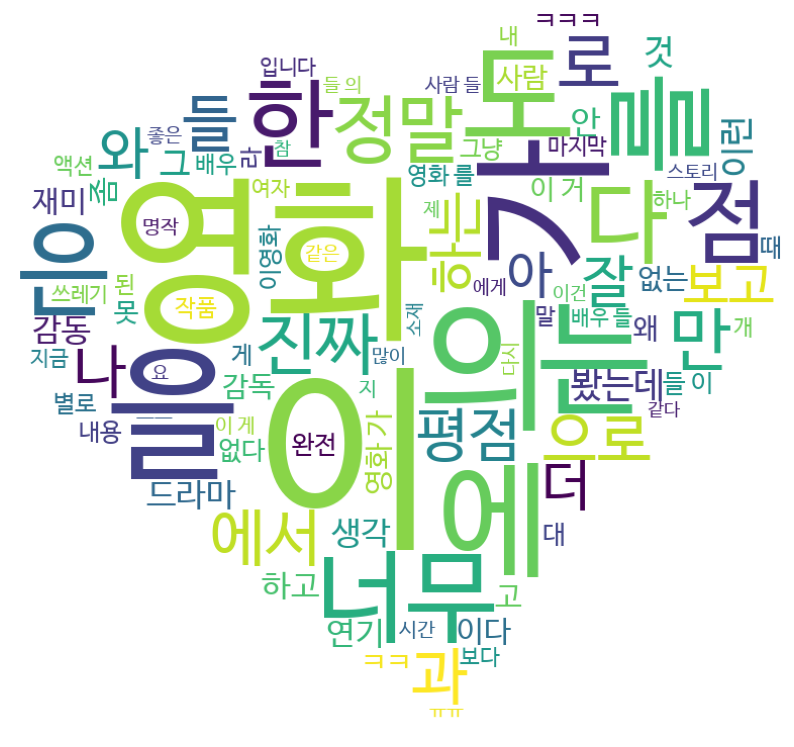

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(wc_ge)
plt.axis('off')
plt.show()